In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

In [401]:
data = pd.read_pickle('curves.pkl')
data

,X,Y,log
0,0,0,"[0.0, 0.0, 0.0]"
1,0,1,"[0.0, 0.0, 0.0]"
2,0,2,"[0.0, 0.0, 0.0]"
3,0,3,"[0.0, 0.0, 0.0]"
4,0,4,"[0.0, 0.0, 0.0]"
...,...,...,...
1906,48,34,"[0.595, 0.595, 0.595, 0.15166667, 0.13611111, ..."
1907,48,35,"[0.595, 0.595, 0.595, 0.55611111, 0.27611111, ..."
1908,48,36,"[0.6624300527353896, 0.6624300527353896, 0.662..."
1909,48,37,"[0.595, 0.595, 0.595, 0.55611111, 0.2942265806..."


In [402]:
X_cor = data.X.tolist()
Y_cor = data.Y.tolist()

In [403]:
data.shape

(1911, 3)

In [404]:
X = data.log.values.tolist()
X

[array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0.73455644, 0.0878656 , 0.08083636, 0.07380711, 0.09489485,
        0.1159826 , 0.11636898, 0.10862278, 0.10891758, 0.10208976,
        0.09429756, 0.13335449, 0.18989938, 0.48853275, 0.48853275,
        0.09489485, 0.0878656 , 0.09489485, 0.08083636, 0.07380711,
        0.08083636, 0.18276046, 0.25656756, 0.58694223]),
 array([0.78671522, 0.51192952, 0.23714382, 0.16186007, 0.11668982,
        0.07904794, 0.07528375, 0.07151957, 0.07151957, 0.07151957,
        0.07151957, 0.07904794, 0.08657632, 0.10163307, 0.1040236 ,
        0.10665645, 0.11753244, 0.12881638, 0.13180327, 0.13755998,
        0.14315584, 0.14913041, 0.1569988 , 0.15087212, 0.15002594,
        0.14731332, 0.13711077, 0.12506441, 0.11167336, 0.10783616,
        0.1030136 , 0.08831051, 0.07604646, 0.07283824, 0.069637

In [405]:
len(X)

1911

In [406]:
max_len = 0
for i in range(len(X)):
    if len(X[i]) >  max_len:
        max_len = len(X[i])


In [407]:
max_len

743

In [408]:
for i in range(len(X)):
    if len(X[i]) <  max_len:
        X[i] = np.append(X[i], np.zeros(max_len- len(X[i])))

In [409]:
len(X)

1911

In [410]:
kmeans = KMeans() 

In [416]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0  49]
 [  1 469]
 [  2  27]
 [  3  74]
 [  4 197]
 [  5 915]
 [  6  23]
 [  7   1]
 [  8 145]
 [  9  11]]


In [438]:
leg = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']

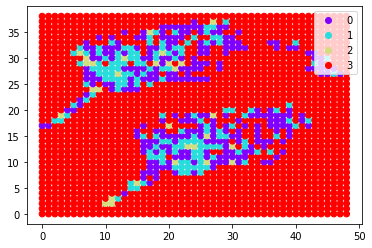

In [453]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)
scatter = plt.scatter(X_cor,Y_cor, c=kmeans.labels_, cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0], labels=leg)

In [442]:
 print(kmeans.cluster_centers_)

[[ 2.72809102e-01  2.96063307e-01  3.27448667e-01 ... -2.03287907e-20
  -2.03287907e-20 -2.03287907e-20]
 [ 5.49642489e-01  4.98493830e-01  4.64053330e-01 ...  1.15196481e-19
   1.15196481e-19  1.15196481e-19]
 [ 2.28538191e-01  2.30354978e-01  2.32479335e-01 ... -1.35525272e-20
  -1.35525272e-20 -1.35525272e-20]
 [ 2.24764296e-01  2.24862737e-01  2.24961179e-01 ...  2.60311857e-03
   2.60311857e-03  2.60311857e-03]]


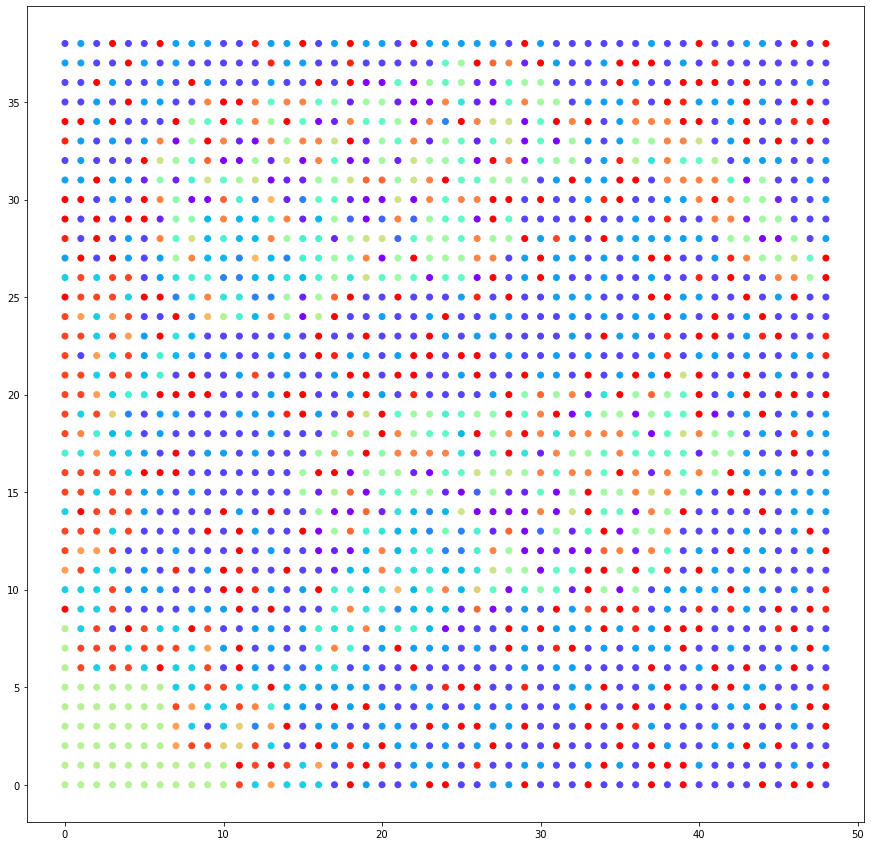

In [249]:
plt.figure(figsize=(15,15))
plt.scatter(X_cor,Y_cor, c=kmeans.labels_, cmap='rainbow')

In [36]:
res = pd.DataFrame({'predict': kmeans.labels_})
res

,predict
0,15
1,15
2,15
3,15
4,15
...,...
1906,4
1907,18
1908,20
1909,18


## TSNE + DBSCAN

In [106]:
model = TSNE(learning_rate=100, verbose = 1)

In [108]:
transformed = model.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1911 samples in 0.002s...
[t-SNE] Computed neighbors for 1911 samples in 0.226s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1911
[t-SNE] Computed conditional probabilities for sample 1911 / 1911
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.252998
[t-SNE] KL divergence after 1000 iterations: 0.211625


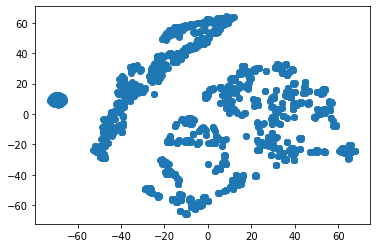

In [109]:
x_axis = transformed[:, 0].reshape(1, -1)
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

In [397]:
get_clusters = DBSCAN(eps=3, min_samples=2).fit(transformed)
get_clusters.labels_

array([ 0,  0,  0, ..., 12, 48,  1], dtype=int64)

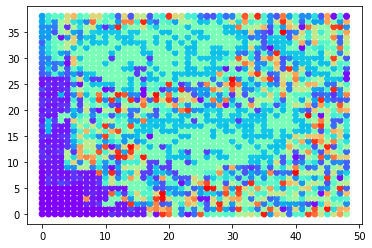

In [398]:
plt.scatter(X_cor,Y_cor, c=get_clusters.labels_, cmap='rainbow')

In [399]:
unique, counts = np.unique(get_clusters.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0  58]
 [  1  37]
 [  2  75]
 [  3  13]
 [  4  45]
 [  5  33]
 [  6   3]
 [  7  66]
 [  8  32]
 [  9  21]
 [ 10  25]
 [ 11  38]
 [ 12  46]
 [ 13  15]
 [ 14  48]
 [ 15  20]
 [ 16   2]
 [ 17 131]
 [ 18 138]
 [ 19  10]
 [ 20   4]
 [ 21  25]
 [ 22  12]
 [ 23   9]
 [ 24  35]
 [ 25  32]
 [ 26  35]
 [ 27  41]
 [ 28  22]
 [ 29   5]
 [ 30  51]
 [ 31 320]
 [ 32   6]
 [ 33  47]
 [ 34  15]
 [ 35   5]
 [ 36  40]
 [ 37   6]
 [ 38  34]
 [ 39  26]
 [ 40  20]
 [ 41  26]
 [ 42   5]
 [ 43  36]
 [ 44   4]
 [ 45   7]
 [ 46  10]
 [ 47  13]
 [ 48  20]
 [ 49  16]
 [ 50   9]
 [ 51   2]
 [ 52  21]
 [ 53  12]
 [ 54   7]
 [ 55   2]
 [ 56   9]
 [ 57   8]
 [ 58   9]
 [ 59  20]
 [ 60  15]
 [ 61   5]
 [ 62   4]
 [ 63   5]]


In [115]:
res = pd.DataFrame({'predict': get_clusters.labels_})
res

,predict
0,0
1,0
2,0
3,0
4,0
...,...
1906,4
1907,8
1908,5
1909,6


## PCA + T_SNE + DBSCAN

In [386]:
from sklearn.decomposition import PCA
pca_scores = PCA(n_components= 32).fit_transform(X)

In [387]:
model = TSNE(learning_rate=100, verbose = 1)

In [388]:
transformed = model.fit_transform(pca_scores)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1911 samples in 0.006s...
[t-SNE] Computed neighbors for 1911 samples in 0.253s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1911
[t-SNE] Computed conditional probabilities for sample 1911 / 1911
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.452477
[t-SNE] KL divergence after 1000 iterations: 0.211407


In [394]:
get_clusters = DBSCAN(eps=2, min_samples=3).fit(transformed)
get_clusters.labels_

array([ 0,  0,  0, ..., 17, 76, 48], dtype=int64)

In [395]:
silhouette_score(X, get_clusters.labels_)

0.36493357974364476

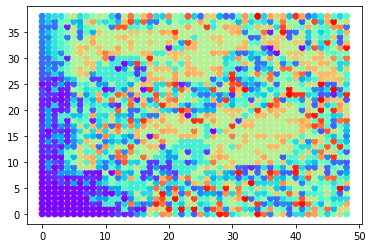

In [396]:
plt.scatter(X_cor,Y_cor, c=get_clusters.labels_, cmap='rainbow')

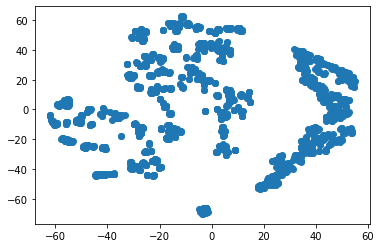

In [209]:
x_axis = transformed[:, 0].reshape(1, -1)
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

## PCA + T_SNE + Kmeans

In [443]:
pca_scores = PCA(n_components= 32).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1911 samples in 0.003s...
[t-SNE] Computed neighbors for 1911 samples in 0.136s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1911
[t-SNE] Computed conditional probabilities for sample 1911 / 1911
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.531258
[t-SNE] KL divergence after 1000 iterations: 0.205709


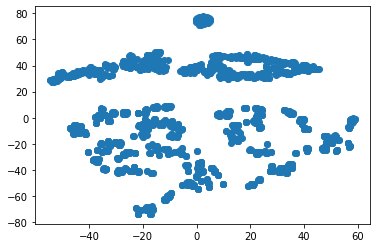

In [444]:
model = TSNE(learning_rate=100, verbose = 1)
transformed = model.fit_transform(pca_scores)
x_axis = transformed[:, 0].reshape(1, -1)
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

0.381828401120199

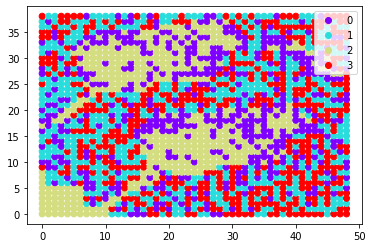

In [473]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(transformed)
plt.scatter(X_cor,Y_cor, c=kmeans.labels_, cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0], labels=leg)
silhouette_score(X, clustering.labels_)

In [474]:
res = pd.DataFrame({'predict': kmeans.labels_})
res

,predict
0,2
1,2
2,2
3,2
4,2
...,...
1906,3
1907,3
1908,1
1909,3
